# Segmentation

Segmentation is the process of partitioning an image into multiple segments. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

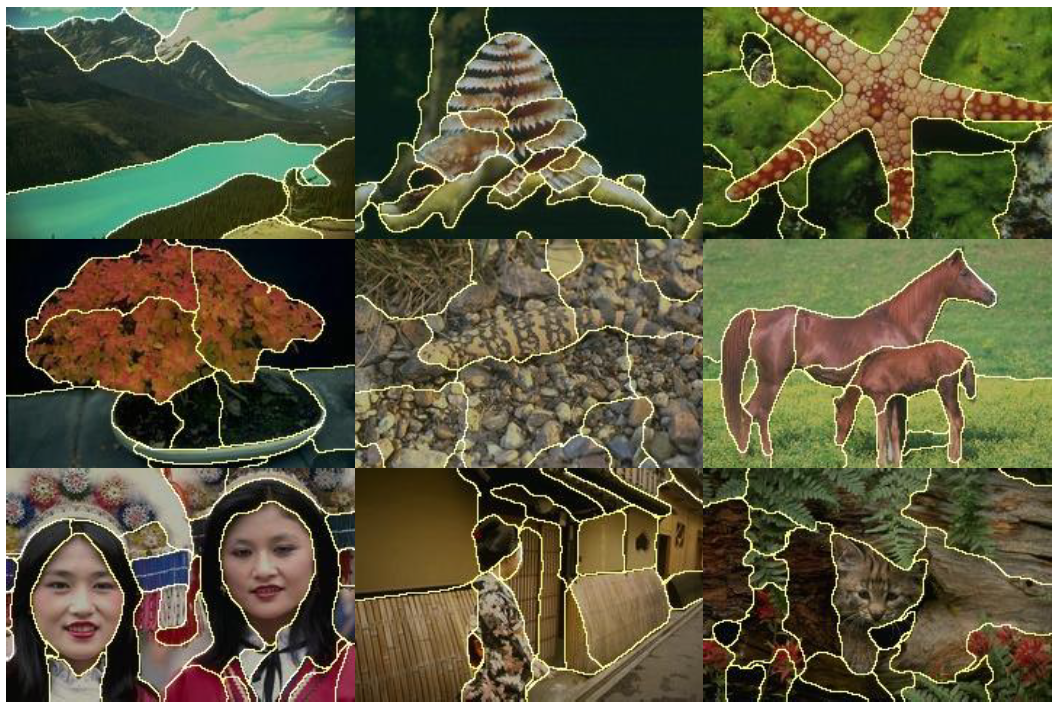

The above figure shows an example of image segmentation.

### Thresholding

Thresholding is the simplest method of image segmentation. From a grayscale image, thresholding can be used to create binary images. In thresholding, we select a threshold value and then all the pixel intensity values greater than the threshold value are classified as 1 (white) and all the pixel intensity values less than the threshold value are classified as 0 (black).

Although this is simple, it has following drawbacks:

- It is not robust to noise.
- It is not robust to variations in lighting conditions.


### Region Growing

Region growing is a simple region-based image segmentation method. It is based on the assumption that neighboring pixels within one region have similar intensity values. The basic algorithm is as follows:

1. Select a seed point.
2. Add the seed point to the region.
3. For each pixel in the region, check all of its neighbors. If the intensity difference between the pixel and the neighbor is less than a threshold, add the neighbor to the region.
4. Repeat step 3 until no more pixels can be added to the region.

This is also simple and invariant to shape and size of the object. But it is sensitive to the seed point. Also, leakage at weak boundaries is possilbe.

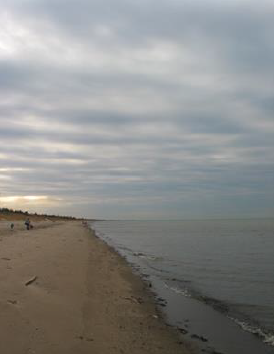

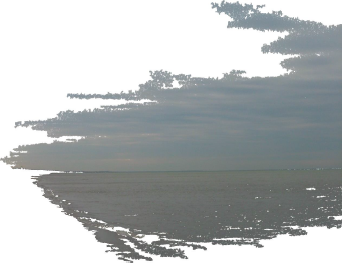

As shown above, at the interface between sea and sky,  the region growing algorithm will grow the region of sea into the sky, which is not the desired result

### Segmentation as Clustering

Segmentation can also be seen as a clustering problem. The goal is to partition the image into clusters such that pixels in the same cluster are similar and pixels in different clusters are dissimilar. 

### K-means Clustering

The most popular clustering algorithm is K-means clustering. K-means clustering is an iterative algorithm that divides a group of n datasets into k subgroups (clusters) based on the similarity and their mean value. The algorithm works as follows:

1. Randomly select k initial cluster centers.
2. Assign each data point to the cluster with the closest center.
3. Update the cluster centers by calculating the mean of all data points in each cluster.
4. Repeat steps 2 and 3 until convergence.

K-means clustering is simple and easy to implement. However, it is sensitive to the initial cluster centers and the number of clusters. Also, it is sensitive to outliers.

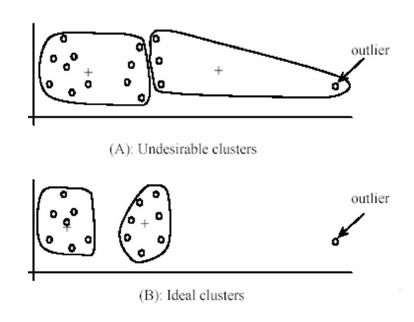

### Mean  Shift Clustering

Mean shift clustering is another clustering algorithm that is used for image segmentation. It is a non-parametric clustering algorithm that does not require the number of clusters to be specified. The algorithm works as follows:

1. Initialize a window size and a kernel function.
2. For each data point, calculate the mean shift vector by computing the weighted average of all data points in the window. Mean can be a simple mean or even a weighted mean.
3. Update the data point by shifting it in the direction of the mean shift vector.
4. Repeat steps 2 and 3 until convergence.

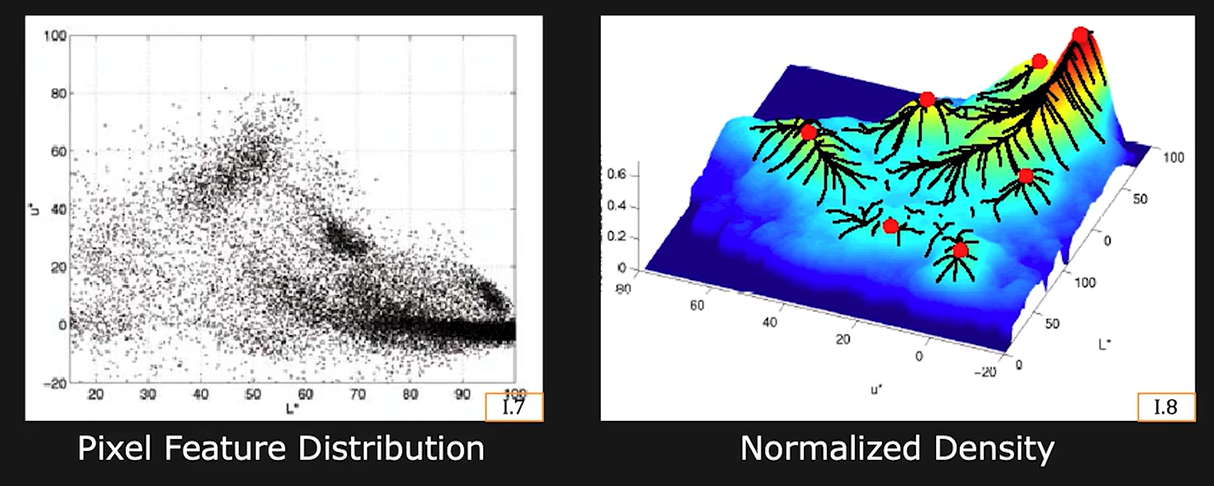

Shown above is the pixel feature distribution for a 2D feature space. Each peak represents a cluster. Can be a higher dimensional feature space as well. The overall goal is for each pixel to move to the nearest peak.

What are features used here?

- Color
- Texture
- Shape
- Location

Cluster: all data points in the attraction basin of a mode

Attraction basin: all data points that converge to a mode

Advantages:

- No need to specify the number of clusters
- Robust to noise and outliers
- Only 1 parameter to tune: window size

Disadvantages:
- Computationally expensive (when feature space is high dimensional)
- Sensitive to window size

In [15]:
import cv2 as cv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ASSET_FOLDER = Path('Images')

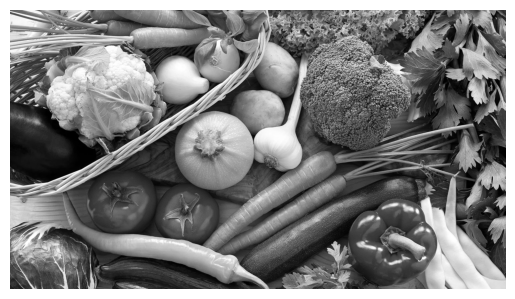

In [9]:
image = cv.imread(str(ASSET_FOLDER / 'vegetables.webp'))
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

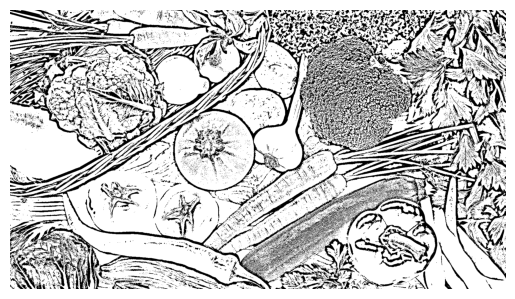

In [11]:
segmented_image = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 10)
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()

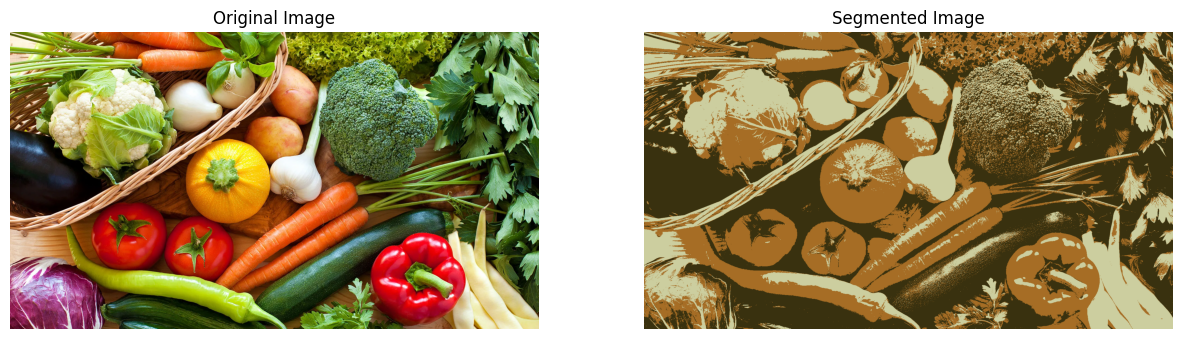

In [19]:
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

# Define criteria and apply K-means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(image[:, :, ::-1])
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_image[:,:,::-1])
axes[1].set_title('Segmented Image')
axes[1].axis('off')

plt.show()